# K-MEANS ALGORITHM

This exercise consists of three parts. Finish the first part to get a mark of 3.0; the first two parts for 4.0. Complete all three parts to get 5.0. <br>
Advanced* and optional - means it is optional and will not affect the grade.

## Part 1

In [3]:
### SOME IMPORTS
import common as cm
import numpy as np
import matplotlib.pyplot as plt
import random


1.1) Complete the following distance function

In [4]:
# Computes a Euclidean distance between points A and B (these are vectors, i.e., A[0], A[1], ....)
def getEuclideanDistance(A, B):
    distance = 0
    
    for i in range(len(A)):
        distance += (A[i] - B[i]) ** 2
    return distance ** 0.5

    
### TEST
print(getEuclideanDistance([0.0, 0.0], [0.0, 1.0]))
print(getEuclideanDistance([0.0, 0.0], [1.0, 1.0]))
print(getEuclideanDistance([0.0,0.0,2.0],[1.0,1.0,1.0]))
print(getEuclideanDistance([0.0,0.0],[0.0,0.0]))

1.0
1.4142135623730951
1.7320508075688772
0.0


1.2) Get test data set & display (data = matrix n x m, n = the number of objects, m = the number of attributes)

In [5]:
data = cm.getTestDataSet()
data

[[0.25980258928914035, 0.7655116779002312],
 [0.18693830608897657, 0.7834271584229567],
 [0.2323892511073395, 0.8060266414635234],
 [0.18245127527368585, 0.7431398467959367],
 [0.2098729415587089, 0.7344682346313631],
 [0.18853229067689722, 0.7842951000809403],
 [0.26912569720966584, 0.7957361528430443],
 [0.19020098972108546, 0.7975175323493953],
 [0.25085655998780676, 0.7246018248223394],
 [0.23532339919378903, 0.871543741261008],
 [0.12962857187109472, 0.873595307576713],
 [0.16401114075234427, 0.7755297044641337],
 [0.16308955536890288, 0.8316926011744782],
 [0.18106441442797522, 0.9119848308841574],
 [0.165411426713162, 0.7653802653838561],
 [0.23742600682065826, 0.8080106874749717],
 [0.15264496361992702, 0.8414462176171933],
 [0.23463371747059406, 0.8019563670471643],
 [0.16481091484141902, 0.7577539191560507],
 [0.15633882350658837, 0.8655833090434761],
 [0.2837812257433207, 0.8077914273778376],
 [0.2581598534580727, 0.8188071959347848],
 [0.14944464908218136, 0.819739481888331

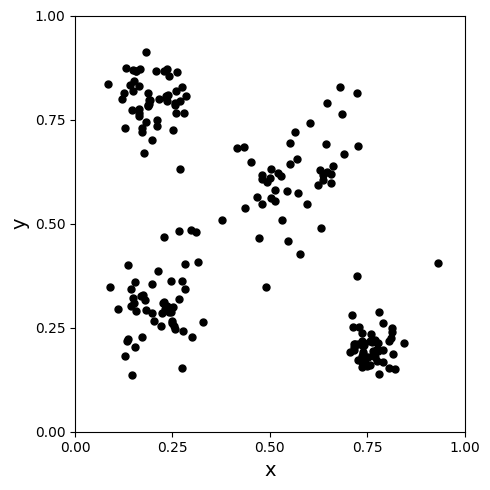

In [6]:
cm.displayDataSet(plt, data) #plt = plot package; see the imports above

**How many different clusters (groups) do you see here?**

In [7]:
4

4

The data for this exercise was generated artificially. You can run the below code to see the "true" group assignment.

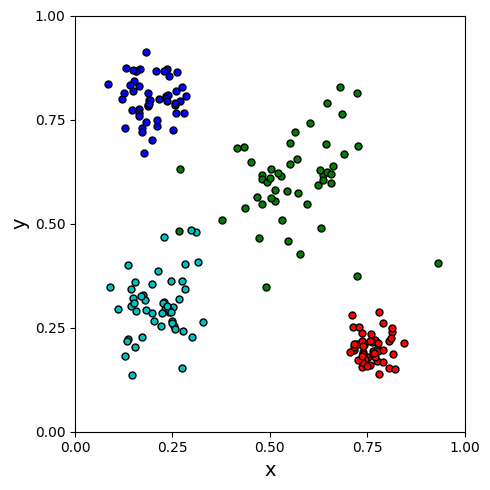

In [8]:
data = cm.getTestDataSet()
assignments = cm.getTestAssignments() ### GET "TRUE" GROUP ASSIGNMENT
cm.displayDataSet(plt, data, assignments = assignments)

1.3) K-Means implementation: Firstly, we need to construct K "centroids". Each centroid represents one group. For simplicity, initially assume that the centroids are randomly selected from the data set (i.e., clone/copy some K random points from data set). Check numpy.random package. Important: each centroid should be unique (no repetitions, consider a "shuffle" approach). Finish the bolow code.

In [9]:
### return a vector of centroids (vectors) [[x1, y1], ..., [xk, yk]]
def getCentroids(k, data):
    indices = np.random.choice(list(range(0, len(data))), size=k, replace=False)
    return [data[index] for index in indices]

print(getCentroids(2, data))

[[0.2771797098499762, 0.24179998035090078], [0.8071220515341826, 0.15248756865160162]]


1.4) Get acquainted with some parameters: 
- DATA - test data set, a vector of  n 2d points: [[x1, y1], ..., [xn, yn]], loaded from common.py
- M - the number of attributes/dimensions; M = 2 for this exercise,
- K - expected number of groups,
- CENTROIDS - initial K centroids; CENTROIDS =  [[x1, y1],...,[xk, yk]],
- ASSIGNMENTS - data structure representing group assignments; ASSIGNMENTS = [[idx1_1,...,],....,[idx1_K,....]], i.e., i-th element is a vector of indexes of corresponding data points in DATA, being assigned to i-th group. For instance if |DATA| = 3, K = 2, and ASSIGNMENTS = [[0, 2], [1]], it means that DATA[0] and DATA[2] points are assigned to the first group, while DATA[1] point is assigned to the second group.

1.5) Finish the below function. It should perform a single step of K-Means algorithm:

a) Firstly, construct new group assignments. For this reason, iterate over all data points. For each (i-th) point, verify its distance to each (k-th) centroid. Check for which centroid the distance is the smallest and update NEW_ASSIGNMENTS adequately (NEW_ASSIGNMENTS[k-th centroid].append(i-th index/data point)).

Important: NO_CHANGE boolean variable should be set to False if the assignments have changed from the previous iteration to the current one (NEW_ASSIGNMENTS != (OLD) ASSIGNMENTS). 

b) Update centroids (NEW_CENTROIDS), i.e., compute centers of masses of data points belonging to different groups. 

c) Return NO_CHANGE, NEW_ASSIGNMENTS, NEW_CENTROIDS.

In [10]:
def get_closest_centroid_index(point, CENTROIDS) -> int:
    distances = [getEuclideanDistance(point, centroid) for centroid in CENTROIDS]
    return distances.index(min(distances))

# Cluster can be empty then point[0] doesn't exist
def calculate_centroid(points):
    centroid = []
    if len(points) == 0:
        return 0 
    else:
        for i in range(len(points[0])):
            centroid.append(np.mean([point[i] for point in points]))
    return centroid



def doKMeansStep(DATA, M, K, CENTROIDS, ASSIGNMENTS):
    ### CONSTRUCT NEW ASSIGNMENTS
    NEW_ASSIGNMENTS = [[] for k in range(K)]
    for i, point in enumerate(DATA):
        NEW_ASSIGNMENTS[get_closest_centroid_index(point, CENTROIDS)].append(i)
    for cluster in NEW_ASSIGNMENTS:
        if len(cluster) == 0:
            cluster.append(DATA.index(random.choice(DATA)))
    NO_CHANGE = (ASSIGNMENTS == NEW_ASSIGNMENTS)

    ### CONSTRUCT NEW CENTROIDS
    NEW_CENTROIDS = []
    for index_cluster in NEW_ASSIGNMENTS:
        cluster_point_list = [DATA[index] for index in index_cluster]
        NEW_CENTROIDS.append(calculate_centroid(cluster_point_list))
   
    return NO_CHANGE, NEW_CENTROIDS, NEW_ASSIGNMENTS

1.6) The below code performs 1 iteration of K-Menas algorithm for K=2 and the test data set. Check the results (notice that centroids are marked with squares).

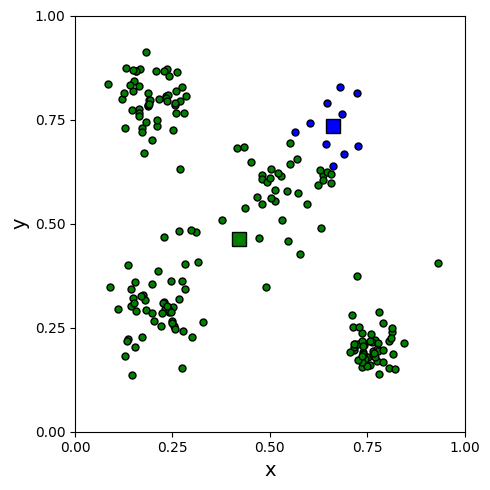

In [11]:
DATA = cm.getTestDataSet()
CENTROIDS = getCentroids(2, DATA)
NO_CHANGE, CENTROIDS, ASSIGNMENTS = doKMeansStep(DATA, 2, 2, CENTROIDS.copy(), None)
cm.displayDataSet(plt, DATA, assignments = ASSIGNMENTS, centroids = CENTROIDS)

1.7) Complete the below piece of code. The doKMeans function should perform 100 steps of K-Means algorithm. However, the loop should be stopped when the NO_CHANGE variable = True. It that is so, **print the information on after how many iterations the process has stopped**. Lastly, use cm.displayDataSet to depict the final groups. 

(Advanced*): make an animation showing the steps of the K-means algorithm. It is easier to do in jupyter notebook.
https://matplotlib.org/3.3.2/api/animation_api.html
http://louistiao.me/posts/notebooks/embedding-matplotlib-animations-in-jupyter-notebooks/

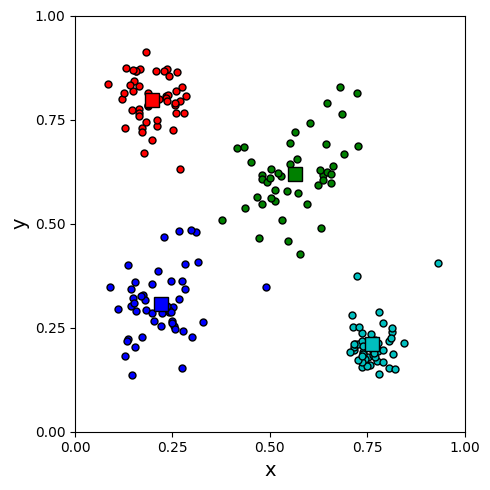

In [12]:
def doKMeans(DATA, CENTROIDS, K = 2, M = 2, display = True):
    ASSIGNMENTS = [[] for i in range(K)]
    NO_CHANGE = False
    for i in range(100):
        if NO_CHANGE:
            # print(f"The k-means took {i-1} iterations")
            break
        NO_CHANGE, CENTROIDS, ASSIGNMENTS = doKMeansStep(DATA, M, K, CENTROIDS, ASSIGNMENTS)
        # print(NO_CHANGE,CENTROIDS,ASSIGNMENTS)
    return DATA, CENTROIDS, ASSIGNMENTS   

K = 4
DATA = cm.getTestDataSet()
CENTROIDS = getCentroids(K, DATA)
DATA, CENTROIDS, ASSIGNMENTS = doKMeans(DATA, CENTROIDS, K = K)
cm.displayDataSet(plt, DATA, assignments = ASSIGNMENTS, centroids = CENTROIDS)

1.8) Run the below piece of code and observe the results. Which K seems to be the best choice?

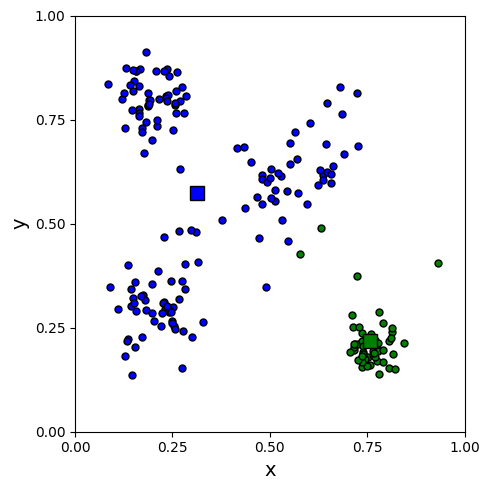

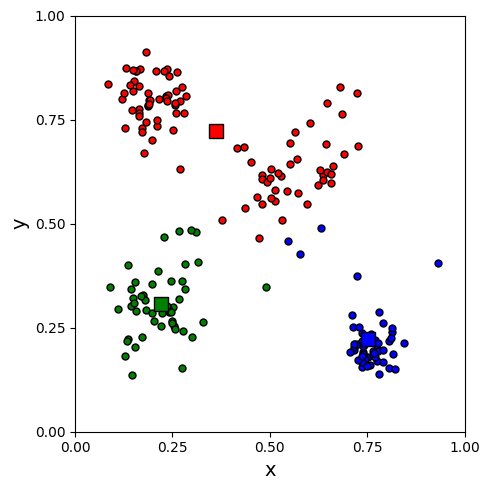

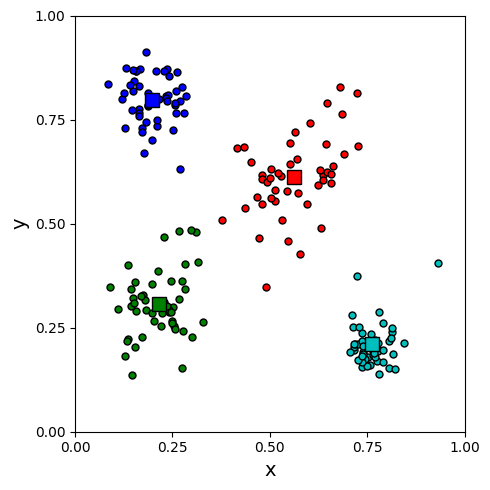

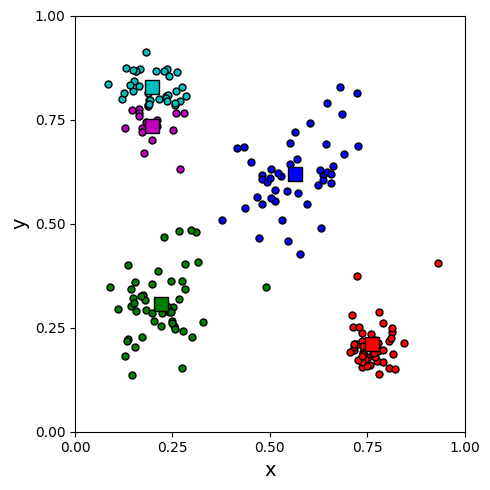

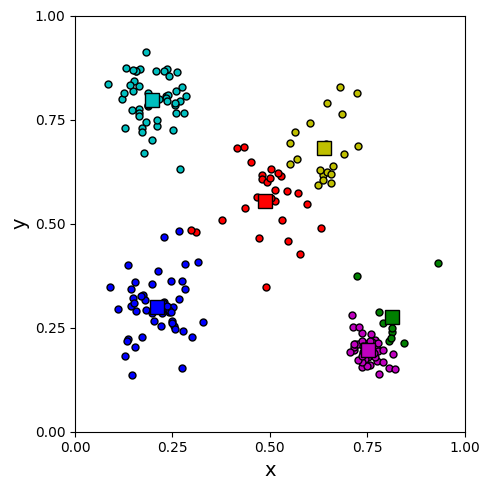

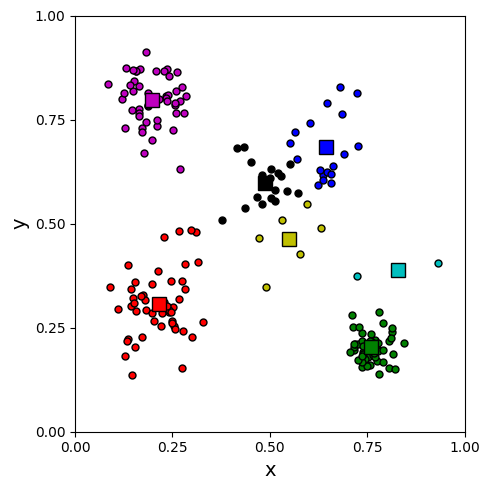

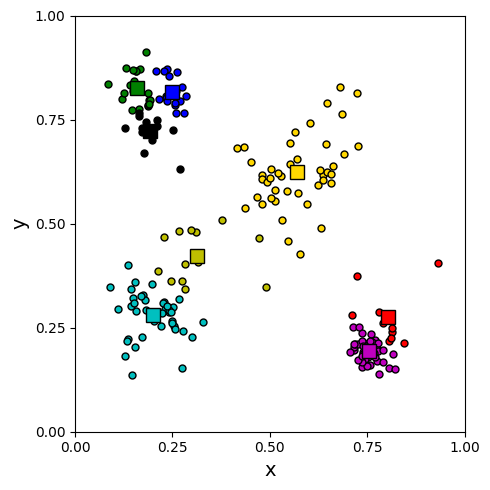

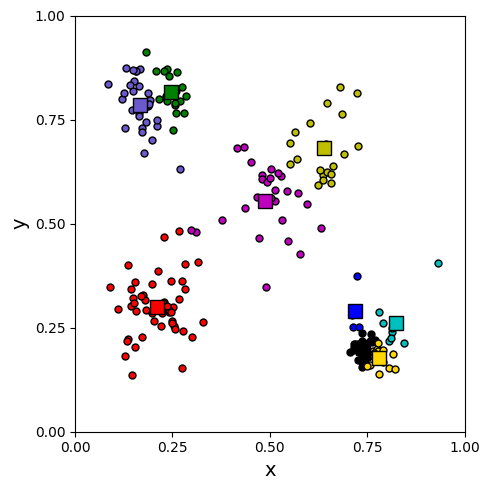

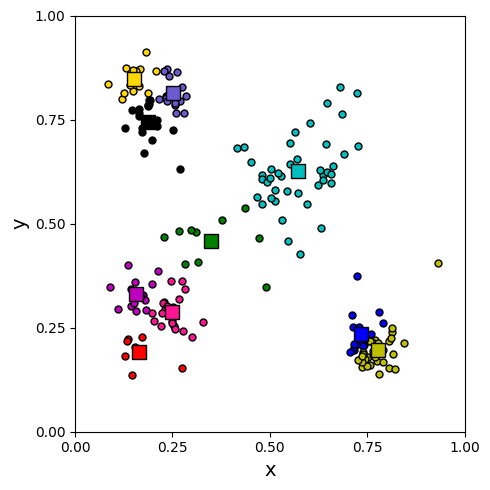

In [13]:
DATA = cm.getTestDataSet()
for k in range(2, 11):
    CENTROIDS = getCentroids(k, DATA)
    DATA, NEW_CENTROIDS, NEW_ASSIGNMENTS = doKMeans(DATA, CENTROIDS, K = k)
    cm.displayDataSet(plt, DATA, assignments = NEW_ASSIGNMENTS, centroids = NEW_CENTROIDS)

As mentioned previously, 4 seems to be the best choice.

## Part 2

The quality of final group assignment can be assessed in various ways. In this exercise, you are asked to compute a total (sum) distance between data points and their cluster centroids for different values of K. Obviously, it is expected that such indicator will always decrese with the increase of K. But, obviously, $K=\infty$ is not the best option. However, there exsits some threshold K' such that for each K'' > K' the decrease will not be significant. This threshold is called an "elbow" and its corresponding K value is considered satisfactory. Firstly, complete the below function. It should compute the total (sum) distance between data points and their cluster centroids. Secondly, compute the the total distances for final clusters for for $K\in [2, 10]$. Then, plot the results. Use cm.displayResults(plt, results), where results takes the follwoing form: [[2, result for K = 2], [3, result for K = 3], ..., [10, result for K = 10]]. **Find the "elbow"**.

In [14]:
def getTotalDistance(DATA, CENTROIDS, ASSIGNMENTS):
    total_distance = 0
    for cluster_index, cluster in enumerate(ASSIGNMENTS):
        for point_index in cluster:
            total_distance += getEuclideanDistance(DATA[point_index], CENTROIDS[cluster_index])
    return total_distance

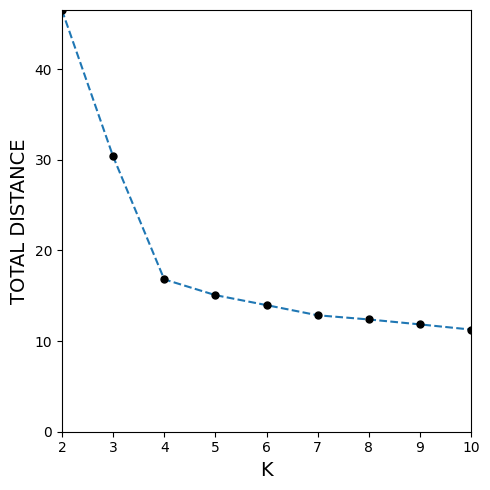

In [15]:
from collections import defaultdict
SIMULATIONS = 100
simulation_list = []
DATA = cm.getTestDataSet()
for _ in range(SIMULATIONS):
    total_distance_list = []
    for k in range(2, 11):
        CENTROIDS = getCentroids(k, DATA)
        DATA, NEW_CENTROIDS, NEW_ASSIGNMENTS = doKMeans(DATA, CENTROIDS, K = k)
        total_distance_list.append(getTotalDistance(DATA, NEW_CENTROIDS, NEW_ASSIGNMENTS))
        simulation_list.append(total_distance_list)
        
k_size_and_values = defaultdict(list)
for simulation in simulation_list:
    for k, k_result in enumerate(simulation, 2):
        k_size_and_values[k].append(k_result)

simulation_result = []
for k_size, values in k_size_and_values.items():
    simulation_result.append([k_size, np.mean(values)])

cm.displayResults(plt, simulation_result)

Even for a small number of simulations K = 4 is an obvious elbow.

# Part 3 - a small case study

In [16]:
DATA = np.array(cm.getCaseDataSet())

In [17]:
attributes = "Age Salary Health_Index Time_in_School_or_Work Time_Activities".split()
for col, attribute in zip(DATA.T, attributes):
    print(attribute, f"\nmin: {col.min()}", f"max: {col.max()}")

Age 
min: 15.012362258670485 max: 79.5991240593619
Salary 
min: 5.682015914647337 max: 6784.1019258316755
Health_Index 
min: 12.913542297443495 max: 99.881408211431
Time_in_School_or_Work 
min: 0.02237807600858785 max: 59.98286275905256
Time_Activities 
min: 0.07828167791577645 max: 19.538265943140427


In [18]:
NORMALIZED_DATA = []
for col in DATA.T:
    new_values = (col - min(col)) / (max(col) - min(col))
    NORMALIZED_DATA.append(new_values)
NORMALIZED_DATA = np.array(NORMALIZED_DATA).T
DATA = NORMALIZED_DATA.tolist()

getCentroids(2,DATA)

[[0.16880152085540945,
  0.2683982302505691,
  0.20889653481433898,
  0.6744598488908347,
  0.048091804975626554],
 [0.04260038682494824,
  0.029300514747241317,
  0.7844122977476641,
  0.23181258004273209,
  0.6316966052510898]]

In [19]:
def doKMeans_CaseStudy(DATA, K=2, M=5):
    CENTROIDS = getCentroids(K, DATA)
    ASSIGNMENTS = [[] for i in range(K)]
    NO_CHANGE = False
    for i in range(100):
        if NO_CHANGE:
            # print(f"The k-means took {i-1} iterations")
            break
        NO_CHANGE, CENTROIDS, ASSIGNMENTS = doKMeansStep(DATA, M, K, CENTROIDS, ASSIGNMENTS)
    return DATA, CENTROIDS, ASSIGNMENTS
# DATA_N, CENTROIDS, ASSIGNMENTS = doKMeans_CaseStudy(NORMALIZED_DATA, K = 4)

SIMULATIONS = 1_00
simulation_list = []
for _ in range(SIMULATIONS):
    total_distance_list = []
    for k in range(2, 11):
        DATA, NEW_CENTROIDS, NEW_ASSIGNMENTS = doKMeans_CaseStudy(DATA, k)
        total_distance_list.append(getTotalDistance(DATA, NEW_CENTROIDS, NEW_ASSIGNMENTS))
    simulation_list.append(total_distance_list)

k_size_and_values = defaultdict(list)
for simulation in simulation_list:
    for k, k_result in enumerate(simulation, 2):
        k_size_and_values[k].append(k_result)

simulation_result = []
for k_size, values in k_size_and_values.items():
    simulation_result.append([k_size, np.mean(values)])

**Characterize the data in clusters generated by K-means run for suitably adjusted K**

### DISPLAY - SUMMARIZE - STATS FOR THE BEST K FOUND IN THE PREVIOUS STEP

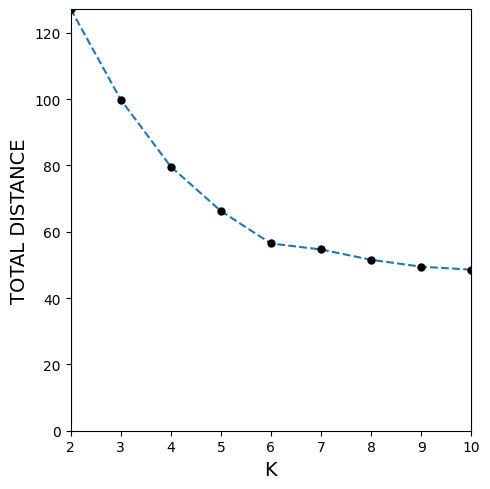

In [20]:
cm.displayResults(plt, simulation_result)

In [43]:
_, NEW_CENTROIDS, NEW_ASSIGNMENTS = doKMeans_CaseStudy(DATA, 6)

DATA = np.array(cm.getCaseDataSet())

for centroid, index_cluster_i, index_cluster in zip(NEW_CENTROIDS, range(len(NEW_ASSIGNMENTS)), NEW_ASSIGNMENTS):
        cluster_point_list = [DATA[index] for index in index_cluster]
        print(f"Cluster {index_cluster_i} Centroid {centroid}")
        df = pd.DataFrame(cluster_point_list, columns=attributes)
        for column in df.columns:
            print(column)
            print("min", df[column].min())
            print("max", df[column].max())
            print("mean", df[column].mean())
            print("median", df[column].median())
            print("std", df[column].std())
            print("-----".center(50), end="\n")

Cluster 0 Centroid [21.130242987944605, 197.59285661365013, 72.489201712496, 16.379624348214655, 10.343158324396603]
Adults with a big salary, good health, average time spent on activities and long time spent in work.
Age
min 15.012362258670485
max 29.41303379969164
mean 21.130242987944605
median 21.180988193261083
std 3.849062925780132
                      -----                       
Salary
min 5.682015914647337
max 409.4460386786146
mean 197.59285661365013
median 186.5873482148868
std 92.9691222371173
                      -----                       
Health_Index
min 29.948261516677505
max 99.881408211431
mean 72.489201712496
median 75.9829504370235
std 16.548017085483636
                      -----                       
Time_in_School_or_Work
min 10.657911584484529
max 21.164388918312092
mean 16.379624348214655
median 16.254741908177937
std 2.6742640819199326
                      -----                       
Time_Activities
min 1.9009061549577986
max 17.72059446085231
mean 10.3

In [47]:
description_dict = {
    0: "Adults with a big salary, good health, average time spent on activities and long time spent in work.",
    1: "Old adults with low salary and bad health index, strongly connected with no time on activities. Spends average time in work.",
    2: "Earning very little money, students with great health despite average time spent on sport. Spending rather low time in school and work.",
    3: "Adults with good salary, moderate health and average time spent on the activities.",
    4: "Adults with enormous salary and a lot of time spent on work. Probably, because of the well paid healthcare, their body remains well, despite no more time on activities.",
    5: "Adults With very bad health, which has a devastating impact on their work time, earnings. Probably correlated to their very low time spent on sport activity.",
}
print("Not in order due to the randomness of the centroid selection.")
for description in description_dict.values():
    print("-", description)

Not in order due to the randomness of the centroid selection.
- Adults with a big salary, good health, average time spent on activities and long time spent in work.
- Old adults with low salary and bad health index, strongly connected with no time on activities. Spends average time in work.
- Earning very little money, students with great health despite average time spent on sport. Spending rather low time in school and work.
- Adults with good salary, moderate health and average time spent on the activities.
- Adults with enormous salary and a lot of time spent on work. Probably, because of the well paid healthcare, their body remains well, despite no more time on activities.
- Adults With very bad health, which has a devastating impact on their work time, earnings. Probably correlated to their very low time spent on sport activity.


In [ ]:
Szymon Czajkowski, Adam Wilczyński